In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import warnings
warnings.filterwarnings('ignore')

In [2]:
train_dir = 'omr.v6i.folder/train/'
test_dir = 'omr.v6i.folder/test/'
val_dir = 'omr.v6i.folder/valid/'

In [3]:
data_train = image_dataset_from_directory(train_dir,labels='inferred',
                                       label_mode='categorical',interpolation='nearest',image_size=[150,150],batch_size=32,
                                       shuffle=True)
data_validation = image_dataset_from_directory(val_dir,labels='inferred',
                                       label_mode='categorical',interpolation='nearest',image_size=[150,150],batch_size=32,
                                       shuffle=True)
data_test = image_dataset_from_directory(test_dir,labels='inferred',
                                       label_mode='categorical',interpolation='nearest',image_size=[150,150],batch_size=32,
                                       shuffle=True)

Found 4615 files belonging to 5 classes.
Found 550 files belonging to 5 classes.
Found 200 files belonging to 5 classes.


In [4]:
classes_train = data_train.class_names
classes_train

['0', '1', '2', '3', '4']

In [5]:
IMG_SIZE = (256, 256)

# data argumentation
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                       rotation_range=45,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       vertical_flip=True
                                       )

# data argumentation
test_datagen = ImageDataGenerator(rescale= 1 / 255.0)

train_dataset = train_datagen.flow_from_directory(train_dir, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=16, 
                                         shuffle=True,
                                         class_mode="categorical")

test_dataset = test_datagen.flow_from_directory(test_dir, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=16, 
                                         shuffle=True,
                                         class_mode="categorical")

validation_dataset = train_datagen.flow_from_directory(val_dir, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=16, 
                                         shuffle=True,
                                         class_mode="categorical")

Found 4615 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 550 images belonging to 5 classes.


In [6]:
# using resnet152v2 model
resnet152v2 = ResNet152V2(weights='imagenet',include_top=False,input_shape=(256,256,3))
# make pre trained model into non trainable bcoz its takes much time
for layer in resnet152v2.layers:
    layer.trainable = False

In [7]:
# Initialize the model in sequential
model = Sequential()
# add resnet101v2 model into our sequence model
model.add(resnet152v2)
# flatten the model
model.add(Flatten())
# Adding dense layers
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
# Adding output layer
model.add(Dense(5,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 8, 8, 2048)        58331648  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               16777344  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 75,109,637
Trainable params: 16,777,989
Non-trainable params: 58,331,648
_________________________________________________________________


In [8]:
# model compile
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=1,
                    verbose=1)

289/289 [==============================] - 832s 3s/step - loss: 0.8664 - accuracy: 0.6592 - val_loss: 0.4296 - val_accuracy: 0.8527


In [11]:
def img_preprocessing(path):
    sample_mask_img = cv2.imread(path)
    sample_mask_img = cv2.resize(sample_mask_img,(256,256))
    plt.imshow(sample_mask_img)
    sample_mask_img = np.reshape(sample_mask_img,[1,256,256,3])
    sample_mask_img = sample_mask_img/255.0
    return sample_mask_img

1

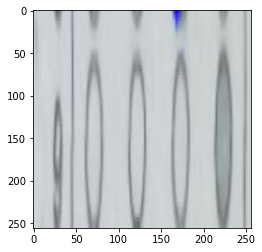

In [14]:
img1 = img_preprocessing('omr.v6i.folder/test/4/th5115-jpg_8_jpg.rf.a6624367b8b247e200d663823f4b4b66.jpg')
np.argmax(model.predict(img1))